# 1. 感知机(Perceptron)

感知机是由美国学者 Frank Rosenblatt 在1957 年提出来的。感知机是作为神经网络（深度学习）的起源的算法，学习感知机的构造也是学习通向神经网络和深度学习的一种重要思想。

感知机接收多个输入信号，输出一个信号。感知机的输出信号只有 **激活** 和 **抑制** (**未激活**) 两种状态，使用1代表激活，0代表未激活。下图是一个接收两个输入信号的感知机的例子。x1、x2 是输入信号，y 是输出信号，w1、w2 是权重。

![9.perceptron.png](images/chapter09/perceptron.png)

图中的 ○ 称为“神经元”或者“节点”。输入信号被送往神经元时，会被分别乘以固定的权重（$w_1 x_1$、$w_2 x_2$）。神经元会计算传送过来的信号的总和，只有当这个总和超过了某个界限值时，才会输出1。这也称为“神经元被激活” 。这里将这个界限值称为阈值，用符号 θ 表示。

$$y=
\begin{cases}
0&w_1 x_1 + w_2 x2 <= \theta \\
1&w_1 x_1 + w_2 x2 > \theta
\end{cases}$$

如果将阈值 θ 改记为 -b，我们将 b 称为偏置(bias)，则

$$y=
\begin{cases}
0&w_1 x_1 + w_2 x2 + b <= 0 \\
1&w_1 x_1 + w_2 x2 + b > 0
\end{cases}$$

## 1.1 实现逻辑运算

现在让我们考虑用感知机来解决简单的逻辑电路问题。这里首先以逻辑电路为题材来思考一下**与门**（AND gate）。与门是有两个输入和一个输出的门电路。

|输入x1|输入x2|输出y|
|--|--|-|
| 0| 0|0|
| 1| 0|0|
| 0| 1|0|
| 1| 1|1|

与门仅在两个输入均为 1 时输出 1，其他时候则输出 0。

我们使用 Python 和 Numpy 实现一个 AND() 函数，这个函数接受两个参数 x1 和 x2，并在函数内初始化参数 w1、w2 和 b：

In [1]:
import numpy as np

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b           # np.sum(w*x)计算相乘后的各个元素的总和
    if tmp <= 0:
        return 0
    else:
        return 1

In [2]:
print(AND(0, 0)) # 输出0
print(AND(1, 0)) # 输出0
print(AND(0, 1)) # 输出0
print(AND(1, 1)) # 输出1

0
0
0
1


除了“与”门，逻辑电路还有两种常用的门：**或门** (OR gate) 和**非门** (NOT gate)。其中**或门**是“只要有一个输入信号是1，输出就为1”的逻辑电路。

|输入x1|输入x2|输出y|
|--|--|-|
| 0| 0|0|
| 1| 0|1|
| 0| 1|1|
| 1| 1|1|

**非门**只有一个输入端，并且输入端和输出端的电平状态总是反相的：

|输入x|输出y|
|--|--|
| 0| 1|
| 1| 0|

我们继续使用 Python 实现或门和非门，其中在或门的实现中，仅设置权重和偏置的值这一点和与门的实现不同。

In [3]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])   # 仅权重和偏置与AND不同
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

In [4]:
def NOT(x):
    return 1 if x <= 0 else 0

## 1.2 感知机的局限性

现在我们来考虑一下**异或门**（XOR gate）。仅当x1 或x2 中的一方为1 时，才会输出1（“异或”是拒绝其他的意思）。

|输入x1|输入x2|输出y|
|--|--|-|
| 0| 0|0|
| 1| 0|1|
| 0| 1|1|
| 1| 1|0|

那么，要用感知机实现这个异或门的话，应该设定什么样的权重参数呢？

**实际上，用前面介绍的感知机是无法实现这个异或门的。**

只拥有一层功能神经元，其学习能力非常有限。与、或、非问题都是线性可分(linearly separable)的问题，即存在一个线性超平面能将它们分开。而异或属于非线性可分问题。

![img](images/chapter09/linearly_separable.png)

## 1.3 多层感知机

感知机不能表示异或门让人深感遗憾，但通过叠加层来构造感知机可以解决非线性可分问题。

下面我们使用之前定义的AND函数、OR函数，可以轻松实现异或门。

In [5]:
def XOR(x1, x2):
    s1 = not AND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [6]:
print(XOR(0, 0)) # 输出0
print(XOR(1, 0)) # 输出1
print(XOR(0, 1)) # 输出1
print(XOR(1, 1)) # 输出0

0
1
1
0


与门、或门是单层感知机，而异或门是一种**多层感知机**（MLP, multi-layered perceptron）。

![img](images/chapter09/multi_layer_perceptron.png)

- 第0 层的两个神经元接收输入信号，并将信号发送至第1 层的神经元。
- 第1 层的神经元将信号发送至第2 层的神经元，第2 层的神经元输出y。

# 2. 神经网络

更一般的，常见的神经网络是如下图所示的层级结构，每层神经元与下一层神经元全互连，神经元之间不存在同层连接，也不存在跨层连接。这样的网络也通常称为 **多层前馈神经网络**(multi-layer feedforward neural network)。

![img](images/chapter09/neural_network.png)

最左边的一列称为**输入层**，最右边的一列称为**输出层**，中间的一列称为**中间层**，也称为隐藏层。中间层和输出层神经元都是拥有激活函数的功能神经元。

## 2.1 激活函数

神经网络的激活函数必须使用非线性函数，否则加深神经网络的层数就没有意义了。

### 2.1.1 阶跃函数

理想中的激活函数是阶跃函数，如上一节所述它将输入值映射为输出值 0 或者 1 ，0 对应神经元抑制，1 对应神经元激活。因此阶跃函数具有不连续、不光滑等性质。可以像下面这样简单地实现阶跃函数。

In [7]:
import numpy as np

def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

这个实现简单、易于理解，但是参数 x 只能接受实数，但不允许参数取 NumPy 数组，例如 step_function(np.array([1.0, 2.0]))，我们将它修改为支持 NumPy 数组的实现。

In [8]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [9]:
step_function(np.array([-1.0, 1.0, 2.0]))

C:\Users\Devon\AppData\Local\Temp/ipykernel_7284/821751868.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


array([0, 1, 1])

In [10]:
import numpy as np
import matplotlib.pylab as plt

C:\Users\Devon\AppData\Local\Temp/ipykernel_7284/4084177707.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


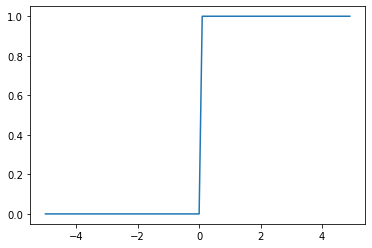

In [11]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.show()

### 2.1.2 Sigmoid 函数

由于阶跃函数的不连续性，实际中常用 sigmoid 函数作为激活函数。

$$ \sigma(x) = \frac{1}{1+e^{-x}} $$

它把可能在较大范围内变化的输入值挤压到 (0, 1) 输出范围内，因此有时也称为“挤压函数”。它的导数有性质：

$$ \sigma(x)' = \sigma(x) \cdot (1-\sigma(x)) $$

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [13]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

之所以 sigmoid 函数的实现能支持 NumPy 数组，原因就在于 NumPy 的广播功能。

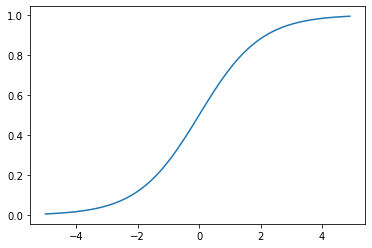

In [14]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

### 2.1.3 Tanh 函数

双曲正切函数有时也被用做神经网络的激活函数，它修正了 Sigmoid 函数不关于原点对称的问题，可是它在两边还是有饱和（也就是导数趋近于0）的问题。

$$ tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$

$$tanh^{'}(x) =1-tanh^2(x) $$

In [15]:
def tanh(x):
    return np.tanh(x)

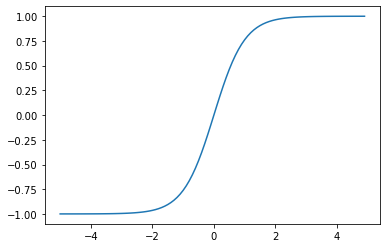

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y = tanh(x)
plt.plot(x, y)
plt.show()

### 2.1.4 ReLU 函数

在神经网络发展的历史上，sigmoid 函数很早就开始被使用了，而最近则主要使用 ReLU（Rectified Linear Unit）函数。ReLU函数可以表示为下面的式：

$$ h(x) = \begin{cases}
x&x > 0 \\
0&x <= 0
\end{cases} $$

ReLU函数的实现也很简单，可以写成如下形式。

In [17]:
def relu(x):
    return np.maximum(0, x)

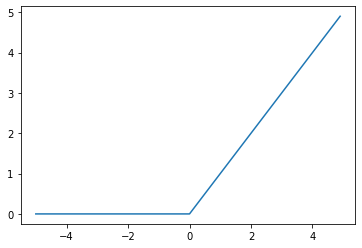

In [18]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

## 2.2 神经网络的实现

现在我们来实现一个简单 3 层神经网络从输入到输出的（前向）处理。先看一下从输入层到第 1 层的第 1 个神经元的信号传递过程，图中增加了表示偏置的神经元“1”。
![img](images/chapter09/layer1.png)

其中，$ w_{12}^{(1)} $ 表示前一层的第 2 个神经元 $ x2 $ 到后一层的第 1 个神经元 $ a_1^{(1)}$ 的权重。因此：

$$ a_1^{(1)} = w_{11}^{(1)} x_1 + w_{12}^{(1)} x_2 + b_1^{(1)} $$

如果使用矩阵的乘法运算，则可以将第 1 层的加权和表示成：
$$ A^{(1)} = XW^{(1)} + B^{(1)} $$

其中，$A^{(1)}$、$X$、$B^{(1)}$、$W^{(1)}$如下所示：

$$ A^{(1)} = \bigl( \begin{matrix} a_1^{(1)} & a_2^{(1)} & a_3^{(1)}\end{matrix} \bigr) $$

$$ X = \bigl( \begin{matrix}x_1 & x_2 \end{matrix} \bigr)$$

$$ B^{(1)} = \bigl( \begin{matrix}b_1^{(1)} & b_2^{(1)}&  b_3^{(1)}\end{matrix} \bigr) $$

$$ W^{(1)} =  \bigl( \begin{matrix}
w_{11}^{(1)}&w_{21}^{(1)}&w_{31}^{(1)}\\
w_{12}^{(1)}&w_{22}^{(1)}&w_{32}^{(1)}
\end{matrix}\bigr) $$

下面我们用 NumPy 多维数组来实现，这里将输入信号、权重、偏置设置成任意值。$X$ 是元素个数为 2 的一维数组，$W_1$是2 × 3 的数组。

In [19]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(X.shape)  # (2,)
print(W1.shape) # (2, 3)
print(B1.shape) # (3,)

(2,)
(2, 3)
(3,)


接下来实现第 1 层中激活函数的计算过程：$Z^{(1)} = \sigma(A^{(1)})$

In [20]:
A1 = np.dot(X, W1) + B1
print(A1)
Z1 = sigmoid(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


下面，我们来实现第 1 层到第 2 层的信号传递，其中第 1 层的输出（$Z^{(1)}$）变成了第 2 层的输入。
![img](images/chapter09/layer2.png)

In [21]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
print(Z1.shape) # (3,)
print(W2.shape) # (3, 2)
print(B2.shape) # (2,)
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.62624937 0.7710107 ]


最后是第 2 层到输出层的信号传递。输出层的实现也和之前的实现基本相同。不过，最后的激活函数和之前的隐藏层有所不同。这里定义了 identity_function() 函数（也称为“恒等函数”），并将其作为输出层的激活函数。

![img](images/chapter09/layer3.png)

In [22]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


## 2.3 前向传播(forward propagation)代码小结

现在我们把之前的代码实现全部整理一下。这里，我们按照神经网络的实现惯例，只把权重记为大写字母 $W_1$，$W_2$，$W_3$，其他的（偏置或中间结果等）都用小写字母表示。

In [23]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


这里定义了 init_network() 和 forward() 函数。init_network() 函数会进行权重和偏置的初始化，并将它们保存在字典变量 network 中。这个字典变量 network 中保存了每一层所需的参数（权重和偏置）。forward() 函数中则封装了将输入信号转换为输出信号的处理过程。

# 3. 输出层的设计

神经网络可以用在分类问题和回归问题上，需要根据具体任务改变输出层的激活函数。一般而言，回归问题用恒等函数，二分类问题使用 sigmoid 函数，多分类问题用 softmax 函数。

分类问题中使用的 softmax 函数可以用下式表示，其中假设输出层共有 n 个神经元，计算第 k 个神经元的输出值 $y_k$。神经网络把输出值最大的神经元所对应的类别作为识别结果。

$$ y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} $$

$$ \sum_{i=1}^n y_i = 1 $$

softmax 函数的输出是 0.0 到 1.0 之间的实数。并且，softmax 函数的输出值的总和为 1。即便使用了softmax 函数，各个元素之间的大小关系也不会改变，这是因为指数函数 $y = exp(x)$ 是单调递增函数。

## 3.1 softmax 函数的实现

现在我们来实现 softmax 函数。

In [24]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)               # 指数函数
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [25]:
sum_exp_a = np.sum(exp_a)       # 指数函数的和
print(sum_exp_a)

74.1221542101633


In [26]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [27]:
np.sum(y)

1.0

将其写成函数形式如下：

In [28]:
def softmax(a):
    exp_a = np.exp(a)
    return exp_a / np.sum(exp_a)

上面的 softmax 函数的实现虽然正确，但在计算机的运算上有一定的缺陷。这个缺陷就是指数函数运算数值溢出问题。例如，$ e^{100}$ 等于2.69e+43，$e^{1000}$ 的结果会返回一个表示无穷大的inf。如果在这些超大值之间进行除法运算，结果会出现“不确定”的情况。

In [29]:
np.exp(1000)

C:\Users\Devon\AppData\Local\Temp/ipykernel_7284/2006519253.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000)


inf

In [30]:
a = np.array([1010, 1000, 990])
softmax(a)

C:\Users\Devon\AppData\Local\Temp/ipykernel_7284/3634570022.py:2: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
C:\Users\Devon\AppData\Local\Temp/ipykernel_7284/3634570022.py:3: RuntimeWarning: invalid value encountered in true_divide
  return exp_a / np.sum(exp_a)


array([nan, nan, nan])

为了防止溢出，softmax 函数的实现可以下式这样进行修改，

$$ 
\begin{aligned}
y_k &= \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} \\
&= \frac{exp(a_k - C')}{\sum_{i=1}^n exp(a_i - C')}
\end{aligned}$$

我们可以令 $ C'$ 为输入信号中的最大值，通过对所有输入信号减去输入信号中的最大值来改进 softmax 函数：

In [31]:
a = np.array([1010, 1000, 990])
print(np.max(a))
a = a - np.max(a)
print(a)

1010
[  0 -10 -20]


In [32]:
np.exp(a) / np.sum(np.exp(a))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

综上，我们可以像下面这样实现 softmax 函数。

In [33]:
def softmax(a):
    exp_a = np.exp(a - np.max(a)) # 溢出对策
    return exp_a / np.sum(exp_a)

In [34]:
a = np.array([1010, 1000, 990])
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

## 3.2 输出层的神经元数量

输出层的神经元数量需要根据待解决的问题来决定。对于分类问题，输出层的神经元数量一般设定为类别的数量。比如，对于手写数字图像识别问题，预测是图中的数字 0 到 9 中的哪一个的问题（10 类别分类问题），可以将输出层的神经元设定为 10 个。

![img](images/chapter09/hand_writing_number.png)

# 4. 手写数字识别

现在我们来试着解决实际问题——进行手写数字图像的分类。

## 4.1 [MNIST 数据集](http://yann.lecun.com/exdb/mnist/)

这里使用的数据集是 MNIST 手写数字图像集。MNIST 是机器学习领域最有名的数据集之一，被应用于从简单的实验到发表的论文研究等各种场合。实际上，在阅读图像识别或机器学习的论文时，MNIST 数据集经常作为实验用的数据出现。

MNIST 数据集是由 0 到 9 的数字图像构成的。训练集包含 6 万张图像，测试集包含 1 万张图像，这些图像可以用于学习和推理。MNIST 数据集的一般使用方法是，先用训练图像进行学习，再用学习到的模型度量能在多大程度上对测试图像进行正确的分类。
![img](images/chapter09/mnist.png)

MNIST 的图像数据是 28 像素× 28 像素的 8bit 灰度图像（单通道），每个像素的取值在 0 到 255 之间。每个图像数据都相应地标有“7”、“2”、“1”等标签。

In [35]:
from demo_code.download import load_mnist
(train_images, train_labels), (test_images, test_labels) = load_mnist()

11493376/11490434 [==============================] - 3s 0us/step
Dataset loading completed


train_images 和 train_labels 组成了训练集（training set），模型将从这些数据中进行学习。然后在测试集（test set，即 test_images 和 test_labels）上对模型进行测试。

In [36]:
train_images.shape

(60000, 28, 28)

In [37]:
image = train_images[0]
label = train_labels[0]
print(label) # 5

5


(28, 28)


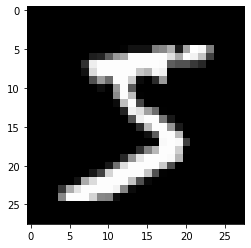

In [38]:
import numpy as np
import matplotlib.pyplot as plt

print(image.shape)
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

## 4.2 神经网络的推理

神经网络的输入层有 784 个神经元（图像分辨率 28 × 28 = 784），输出层有 10 个神经元（数字 0 到9，共 10 个类别）。此外，这个神经网络有 2 个隐藏层，第 1 个隐藏层有 50 个神经元，第 2 个隐藏层有 100 个神经元。这个 50 和 100 可以设置为任何值。

init_network() 会读入保存在 pickle 文件 sample_weight.pkl 中的事先学习好的权重参数，这个文件中以字典变量的形式保存了权重和偏置参数。

In [39]:
def get_data():
    (train_images, train_labels), (test_images, test_labels) = load_mnist()
    return test_images, test_labels

In [40]:
def init_network():
    with open("demo_code/mnist_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

In [41]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [42]:
import pickle

network = init_network()

test_images, test_labels = get_data()
test_images = test_images.astype(np.float32) / 255.0      # Normalization

accuracy_cnt = 0

for i in range(len(test_images)):
    y = predict(network, test_images[i].flatten())
    p = np.argmax(y)                  # argmax获取数组中最大值的索引
    if p == test_labels[i]:
        accuracy_cnt += 1
        
print("Accuracy: " + str(float(accuracy_cnt) / len(test_images)))

Dataset loading completed
Accuracy: 0.9352


在这个例子中，我们对图像进行了预处理，将图像的各个像素值除以 255，使得数值在 0.0~1.0的范围内。

执行上面的代码后，会显示“Accuracy: 0.9352”。这表示有 93.52% 的手写数字图像被正确分类了。目前我们的目标是运行学习到的神经网络，所以暂不讨论识别精度本身。不过以后我们会花精力在神经网络的结构和学习方法上，思考如何进一步提高这个精度。

## 4.3 批处理

批处理对神经网络的运算大有利处，可以大幅缩短每张图像的处理时间。因为多数处理数值计算的库都对大型数组运算的处理进行了优化。并且，在神经网络的运算中，当数据传送成为瓶颈时，批处理可以减轻数据总线的负荷（严格地讲，相对于数据读入，可以将更多的时间用在计算上）。也就是说，批处理一次性计算大型数组要比分开逐步计算各个小型数组速度更快。

现在我们来考虑打包输入多张图像的情形。例如，我们想用 predict() 函数一次性打包处理 100 张图像。可以将 x 的形状改为 100 × 784，

In [43]:
network = init_network()

test_images, test_labels = get_data()
test_images = test_images.astype(np.float32) / 255.0      # Normalization

batch_size = 100
accuracy_cnt = 0
        
for i in range(0, len(test_images), batch_size):
    test_images_batch = test_images[i:i+batch_size].reshape(batch_size, 784)
    y_batch = predict(network, test_images_batch)
    p = np.argmax(y_batch, axis=1)          # 沿指定轴找到最大值元素的索引
    accuracy_cnt += np.sum(p == test_labels[i:i+batch_size])
    
print("Accuracy: " + str(float(accuracy_cnt) / len(test_images)))

Dataset loading completed
Accuracy: 0.9352
